In [32]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# database full path
database_name = 'whistlers.h5'
database_location = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'Data')
database_path = os.path.join(database_location,database_name)

# data variables
awd_events = 2
sites = ['marion', 'sanae']

In [26]:
def extract_spectrogram_info(spectrogram_data):
    '''Extract the time, frequency axis values as well as the 
            spectrogram data.
    inputs:
        spectrogram_data: the spectrogram data including the 
        time and frequency information.
    outputs: 
        time: time values
        frequency: frequency values
        spectrogram: spectrogram
    '''
    time = spectrogram_data[0,1:]
    frequency = spectrogram_data[1:,0]
    spectrogram = spectrogram_data[1:,1:]
    print(time.shape, frequency.shape, spectrogram.shape)
    return time, frequency, spectrogram

(1407,) (257,) (257, 1407)


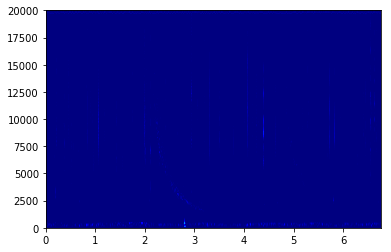

In [49]:
f  = h5py.File(database_path, 'r')
grp = f[os.path.join('awdEvents'+str(1), sites[0],'labelled spectrograms')]
files = list(grp.keys())
file = files[np.random.randint(len(files))] # select a random sample
# create np array to store sample information
data = np.empty(grp[file].shape)
# load information
grp[file].read_direct(data)
out = grp[file].attrs['outputs']
event = grp[file].attrs['events']
f.close()
t,f,s = extract_spectrogram_info(data)
plt.pcolormesh(t,f,s, cmap='jet')